<a href="https://www.kaggle.com/code/sondosaabed/categorial-data-types-examples?scriptVersionId=189371591" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🔴 This notebook is created by https://www.kaggle.com/alaaomar85, uploaded by me to refrence

In [1]:
!pip install skimpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 59.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: polars
    Found existing installation: polars 1.1.0
    Uninstalling polars-1.1.0:
      Successfully uninstalled polars-1.1.0
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uninstalling typeguard-4.1.5:
      Successfully uninstalled typeguard-4.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [3]:
df=pd.read_csv('/kaggle/input/firewall-logs/new_logs.csv')

In [4]:
df.head()

,Time,Log comp,Log subtype,Username,Firewall rule,Firewall rule name,NAT rule,NAT rule name,In interface,Out interface,Src IP,Dst IP,Src port,Dst port,protocol,Rule type,Live PCAP,Message,Log occurrence,Unnamed: 19
0,2024-07-06 12:29:34,Firewall Rule,Allowed,NaN,5.0,WebNat,10,iqrad webserver - DNAT,Port2,Port3,45.147.66.142,82.213.48.193,4036,443,TCP,1,Open PCAP,NaN,1,NaN
1,2024-07-06 12:29:30,Firewall Rule,Allowed,NaN,48.0,DMZ-to-WAN,15,Default SNAT IPv4,Port3,Port2,172.17.17.8,10.101.6.4,52907,443,TCP,1,Open PCAP,NaN,1,NaN
2,2024-07-06 12:29:29,Firewall Rule,Allowed,NaN,2.0,LAN-2-WAN,15,Default SNAT IPv4,Port1,Port2,192.168.61.137,3.72.193.109,53382,443,TCP,1,Open PCAP,NaN,1,NaN
3,2024-07-06 12:29:29,Firewall Rule,Allowed,NaN,5.0,WebNat,10,iqrad webserver - DNAT,Port2,Port3,45.147.66.142,82.213.48.193,32034,443,TCP,1,Open PCAP,NaN,1,NaN
4,2024-07-06 12:29:29,Firewall Rule,Allowed,NaN,48.0,DMZ-to-WAN,14,PublicDNS - SNAT,Port3,Port2,172.17.17.223,23.196.143.19,49302,443,TCP,1,Open PCAP,NaN,1,NaN


In [5]:
df['NAT rule name'].unique()

array(['iqrad webserver - DNAT', 'Default SNAT IPv4', 'PublicDNS - SNAT',
       nan, 'PublicDNS - DNAT'], dtype=object)

### (1) Generate Frequincy distibution Table


In [6]:
for itm in df['NAT rule name'].unique():
                     print(itm,df['NAT rule name'][df['NAT rule name']==itm].count())

iqrad webserver - DNAT 21
Default SNAT IPv4 157
PublicDNS - SNAT 11
nan 0
PublicDNS - DNAT 3


In [7]:

# Get the frequency distribution of the 'NAT rule name' column
frequency_distribution = df['NAT rule name'].value_counts()

# Convert the result to a DataFrame
frequency_distribution_df = frequency_distribution.reset_index()
frequency_distribution_df.columns = ['NAT rule name', 'Frequency']

# Display the frequency distribution table
print(frequency_distribution_df)

            NAT rule name  Frequency
0       Default SNAT IPv4        157
1  iqrad webserver - DNAT         21
2        PublicDNS - SNAT         11
3        PublicDNS - DNAT          3


### (1) Bar chart


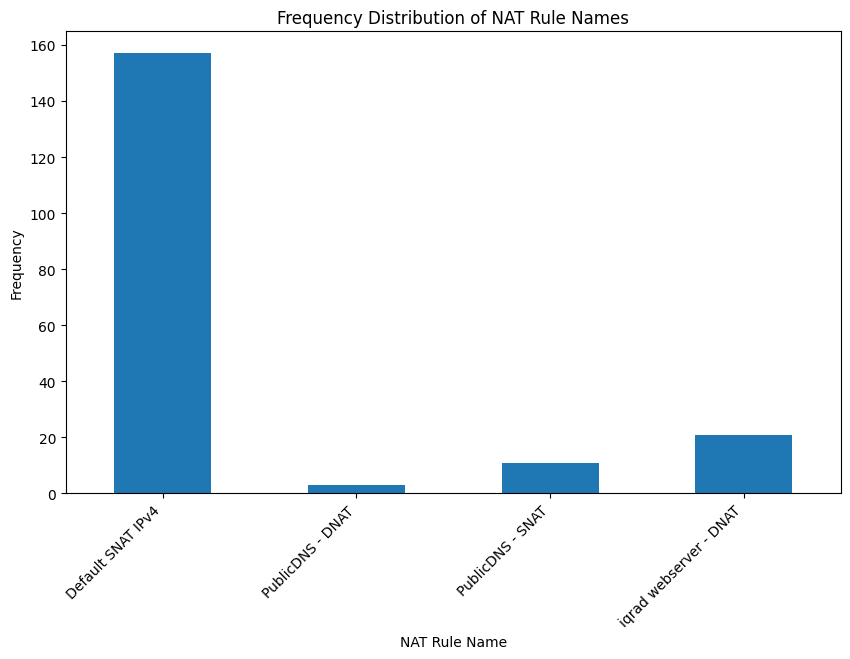

In [8]:

# Step 1: Get the frequency distribution of the 'NAT rule name' column
frequency_distribution = df['NAT rule name'].value_counts().sort_index()

# Step 2: Plot the frequency distribution as a bar chart
plt.figure(figsize=(10, 6))
frequency_distribution.plot(kind='bar')
plt.title('Frequency Distribution of NAT Rule Names')
plt.xlabel('NAT Rule Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


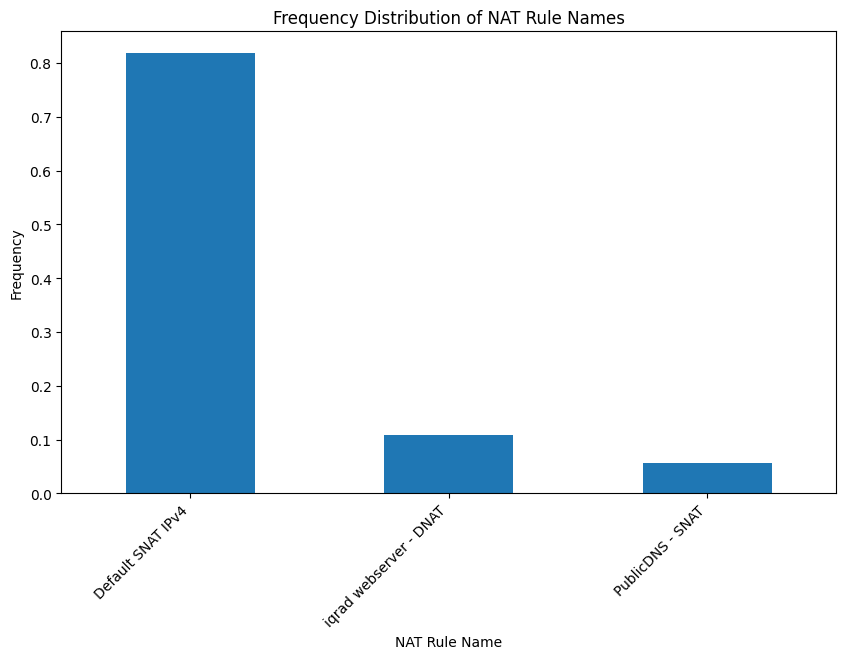

In [9]:

# Step 1: Get the frequency distribution of the 'NAT rule name' column

frequency_distribution = df['NAT rule name'].value_counts(normalize=True).nlargest(3)


# Step 2: Plot the frequency distribution as a bar chart
plt.figure(figsize=(10, 6))
frequency_distribution.plot(kind='bar')
plt.title('Frequency Distribution of NAT Rule Names')
plt.xlabel('NAT Rule Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


Using Seaborn

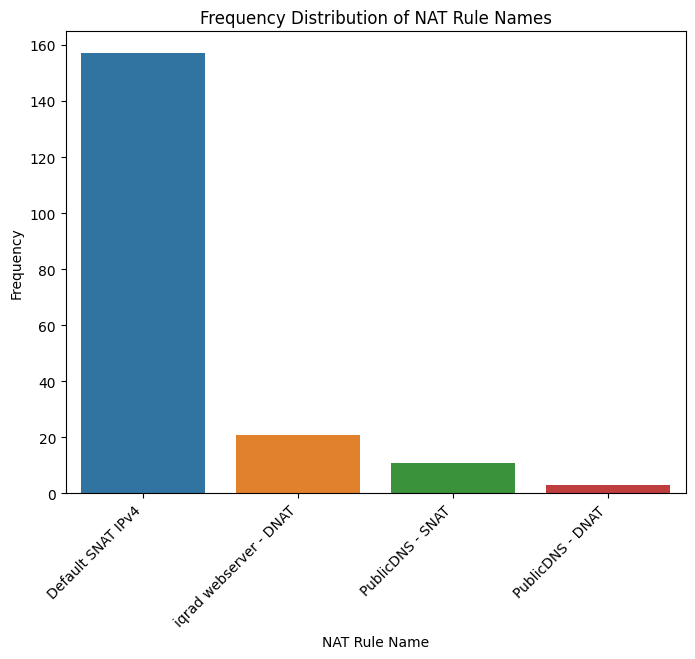

In [10]:
# Step 1: Get the frequency distribution of the 'NAT rule name' column
frequency_distribution = df['NAT rule name'].value_counts().reset_index()
frequency_distribution.columns = ['NAT rule name', 'Frequency']

# Step 2: Plot the frequency distribution as a bar chart using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='NAT rule name', y='Frequency', data=frequency_distribution)
plt.title('Frequency Distribution of NAT Rule Names')
plt.xlabel('NAT Rule Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

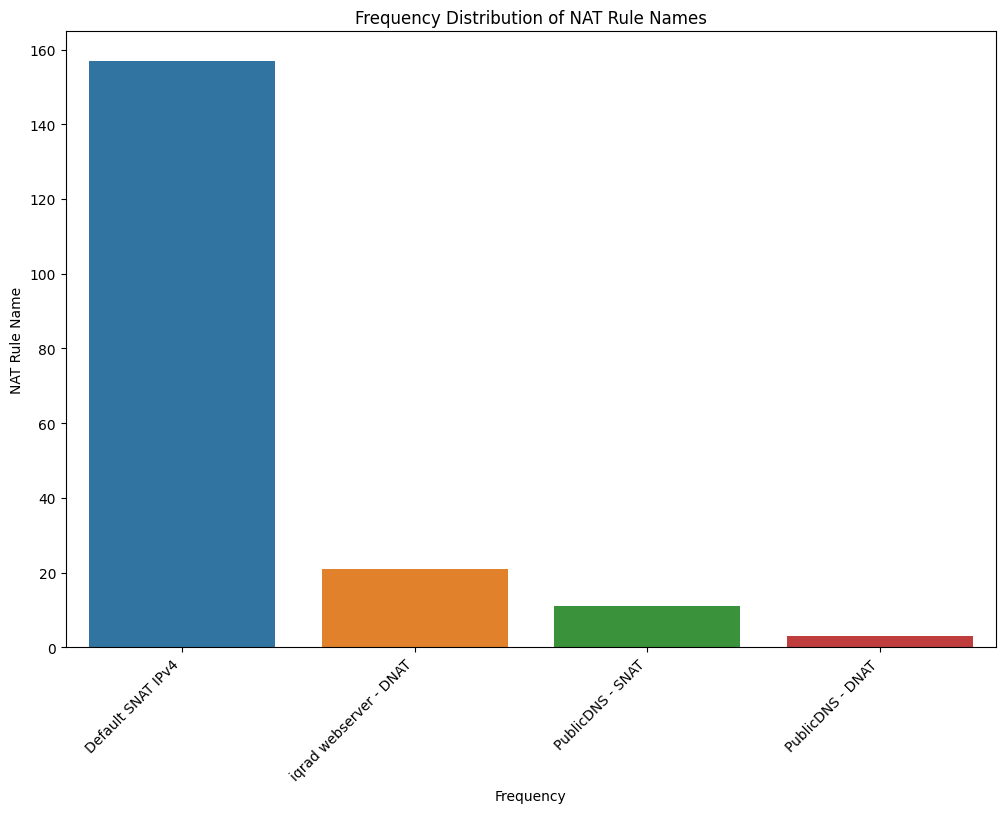

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(x='NAT rule name', data=df, order=df['NAT rule name'].value_counts().index)
plt.title('Frequency Distribution of NAT Rule Names')
plt.xlabel('Frequency')
plt.ylabel('NAT Rule Name')
plt.xticks(rotation=45, ha='right')
plt.show()

### Add numbers on the charts

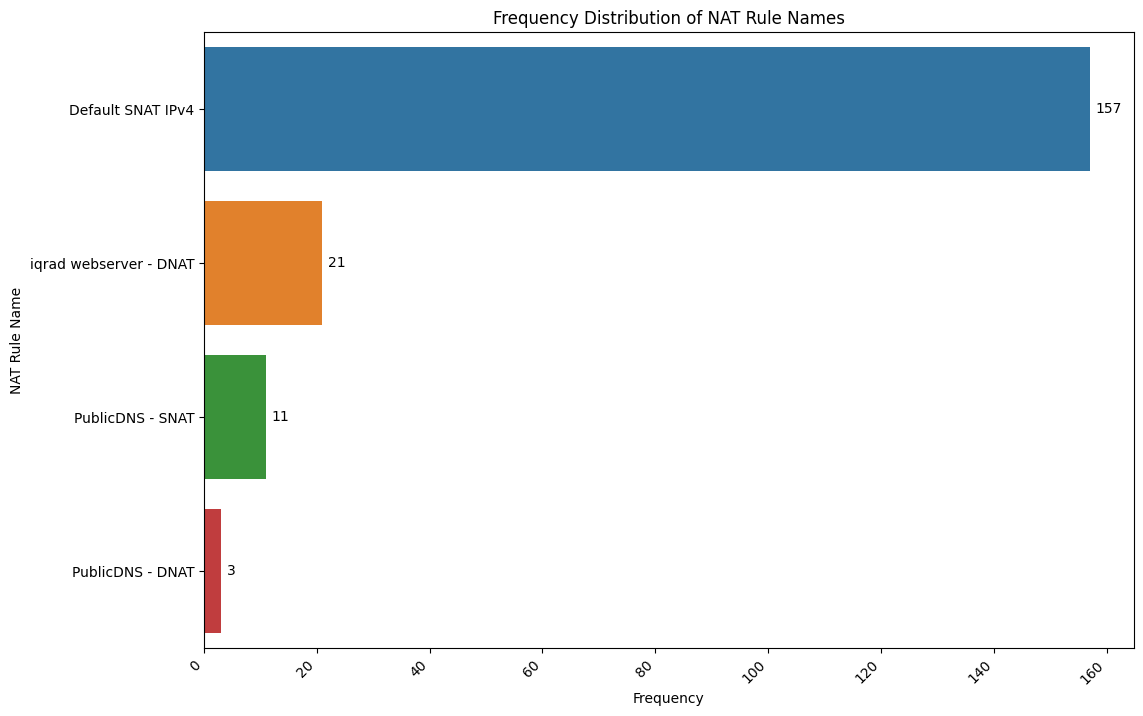

In [12]:
# Step 1: Plot the frequency distribution as a bar chart using seaborn countplot
plt.figure(figsize=(12, 8))
ax = sns.countplot(y='NAT rule name', data=df, order=df['NAT rule name'].value_counts().index)

# Step 2: Add counts on the bars
total_count = df['NAT rule name'].value_counts()
for i, count in enumerate(total_count):
    pct_string = f'{count}'
    ax.text(count + 1, i, pct_string, va='center')

plt.title('Frequency Distribution of NAT Rule Names')
plt.xlabel('Frequency')
plt.ylabel('NAT Rule Name')
plt.xticks(rotation=45, ha='right')
plt.show()


### Pie Chart

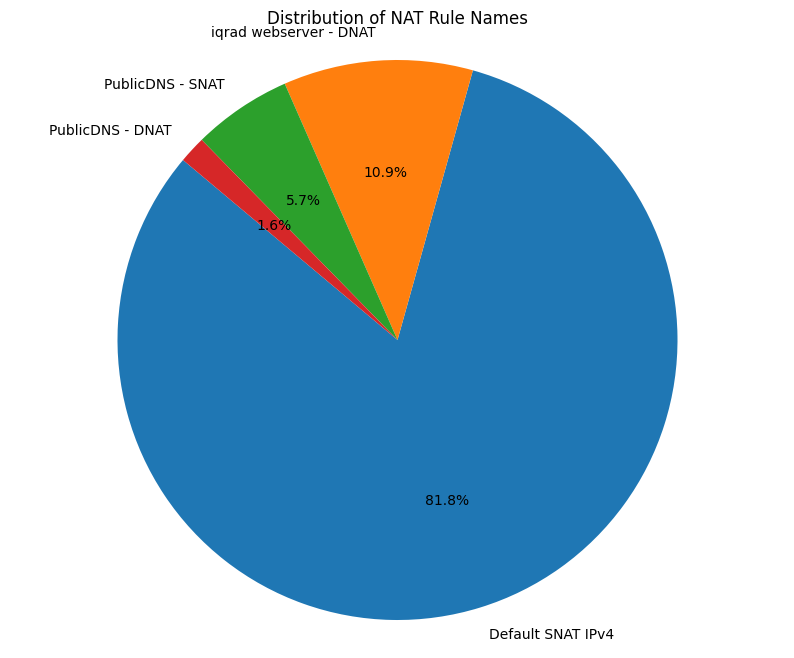

In [13]:
# Step 1: Get the frequency distribution of the 'NAT rule name' column
frequency_distribution = df['NAT rule name'].value_counts()

# Step 2: Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(frequency_distribution, labels=frequency_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of NAT Rule Names')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

NAT rule name
Default SNAT IPv4         157
iqrad webserver - DNAT     21
PublicDNS - SNAT           11
PublicDNS - DNAT            3
Name: count, dtype: int64


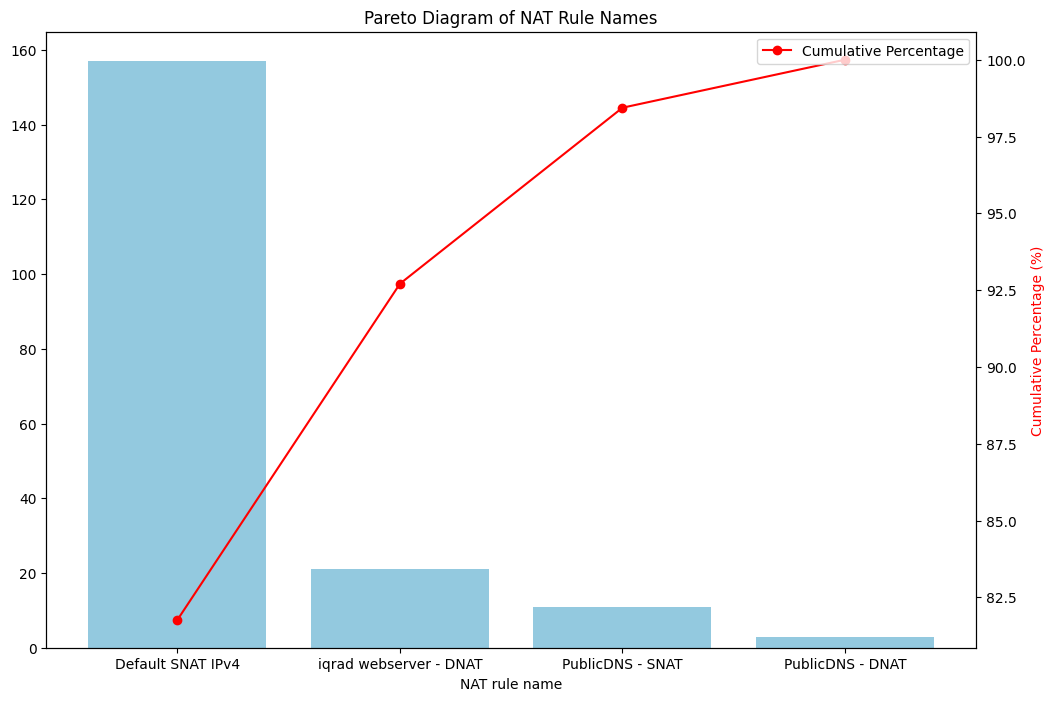

In [14]:
# Step 1: Get the frequency distribution of the 'NAT rule name' column
frequency_distribution = df['NAT rule name'].value_counts()
print(frequency_distribution)
# Step 2: Calculate the cumulative percentage
cumulative_percentage = frequency_distribution.cumsum() / frequency_distribution.sum() * 100
cumulative_percentage
# Step 3: Create a Pareto diagram
plt.figure(figsize=(12, 8))

# Create bar chart for counts
sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values, color='skyblue', label='Frequency')

# Create line chart for cumulative percentage
ax2 = plt.gca().twinx()  # Create a second y-axis to plot the line chart on
ax2.plot(frequency_distribution.index, cumulative_percentage, color='red', marker='o', label='Cumulative Percentage')

# Add labels and title
plt.title('Pareto Diagram of NAT Rule Names')
plt.xlabel('NAT Rule Name')
plt.ylabel('Frequency', color='skyblue')
ax2.set_ylabel('Cumulative Percentage (%)', color='red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


NAT rule name
Default SNAT IPv4         157
iqrad webserver - DNAT     21
PublicDNS - SNAT           11
PublicDNS - DNAT            3
Name: count, dtype: int64


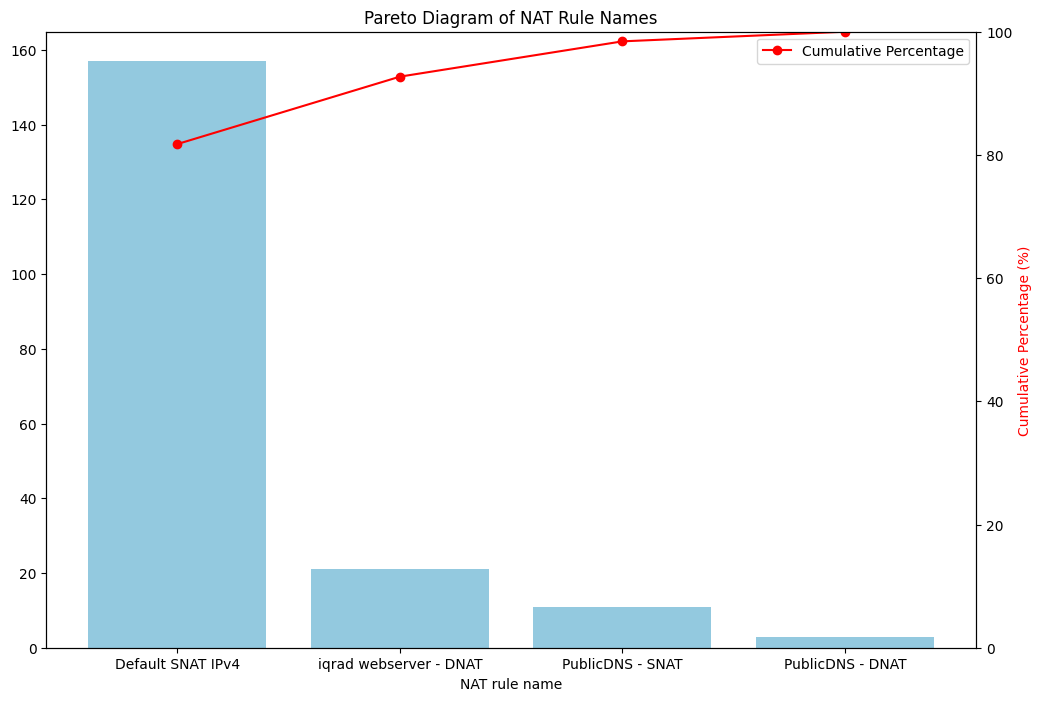

In [15]:
# Step 1: Get the frequency distribution of the 'NAT rule name' column
frequency_distribution = df['NAT rule name'].value_counts()
print(frequency_distribution)

# Step 2: Calculate the cumulative percentage
cumulative_percentage = frequency_distribution.cumsum() / frequency_distribution.sum() * 100
cumulative_percentage

# Step 3: Create a Pareto diagram
plt.figure(figsize=(12, 8))

# Create bar chart for counts
sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values, color='skyblue', label='Frequency')

# Create line chart for cumulative percentage
ax2 = plt.gca().twinx()  # Create a second y-axis to plot the line chart on
ax2.plot(frequency_distribution.index, cumulative_percentage, color='red', marker='o', label='Cumulative Percentage')

# Add labels and title
plt.title('Pareto Diagram of NAT Rule Names')
plt.xlabel('NAT Rule Name')
plt.ylabel('Frequency', color='skyblue')
ax2.set_ylabel('Cumulative Percentage (%)', color='red')

# Set y-axis limits for cumulative percentage to start from zero
ax2.set_ylim(0, 100)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


NAT rule name
Default SNAT IPv4         157
iqrad webserver - DNAT     21
PublicDNS - SNAT           11
PublicDNS - DNAT            3
Name: count, dtype: int64


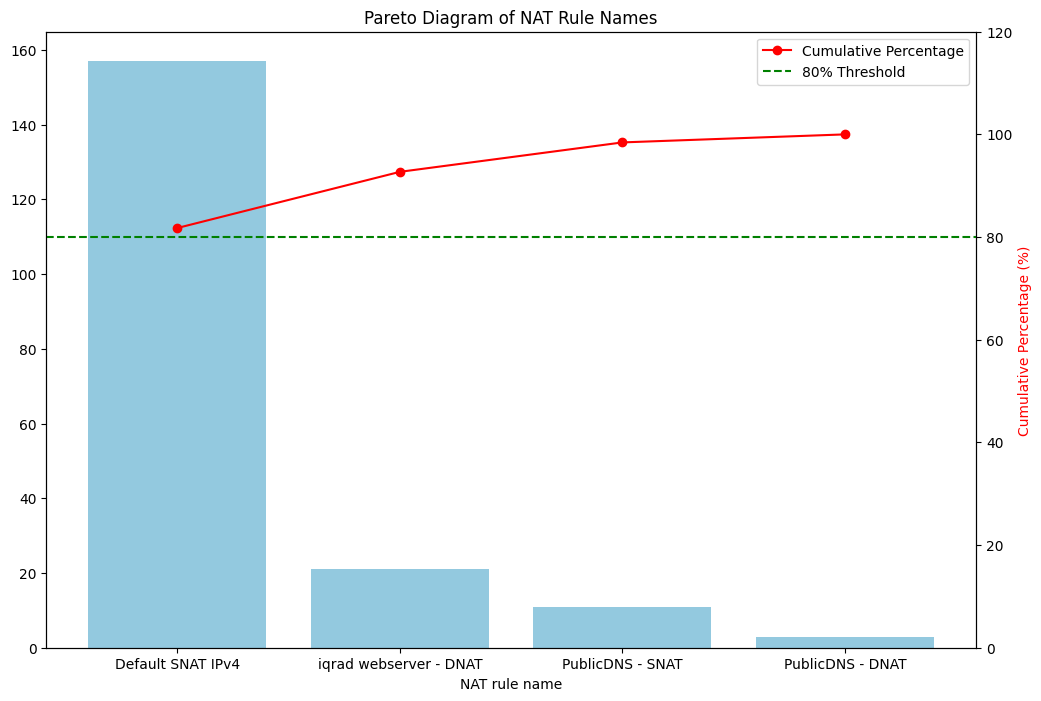

In [16]:
# Step 1: Get the frequency distribution of the 'NAT rule name' column
frequency_distribution = df['NAT rule name'].value_counts()
print(frequency_distribution)

# Step 2: Calculate the cumulative percentage
cumulative_percentage = frequency_distribution.cumsum() / frequency_distribution.sum() * 100
cumulative_percentage

# Step 3: Create a Pareto diagram
plt.figure(figsize=(12, 8))

# Create bar chart for counts
sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values, color='skyblue', label='Frequency')

# Create line chart for cumulative percentage
ax2 = plt.gca().twinx()  # Create a second y-axis to plot the line chart on
ax2.plot(frequency_distribution.index, cumulative_percentage, color='red', marker='o', label='Cumulative Percentage')

# Add labels and title
plt.title('Pareto Diagram of NAT Rule Names')
plt.xlabel('NAT Rule Name')
plt.ylabel('Frequency', color='skyblue')
ax2.set_ylabel('Cumulative Percentage (%)', color='red')

# Set y-axis limits for cumulative percentage to start from zero
ax2.set_ylim(0, 120)

# Add threshold line at 80%
ax2.axhline(80, color='green', linestyle='--', label='80% Threshold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()
